In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import matplotlib.dates as mdates
from dateutil import relativedelta
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.stattools import durbin_watson


Bad key text.latex.preview in file /Users/thomasat/opt/miniconda3/envs/nhanes/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/thomasat/opt/miniconda3/envs/nhanes/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/thomasat/opt/miniconda3/envs/nhanes/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_

In [2]:
ksu_data_folder = '../data/raw/ksu/'
filenames = {'All Fresh Retail Beef': 'all-fresh-retail-beef.csv',
'Choice Retail Beef': 'choice-retail-beef.csv',
'Retail Chicken': 'retail-chicken.csv',
'Retail Pork': 'retail-pork.csv'}
for filename in filenames:
    filenames[filename] = ksu_data_folder +  filenames[filename]

In [3]:
merged = None
for outcome in filenames:
    df = pd.read_csv(filenames[outcome])
    df = df.rename(columns={'Index': outcome})
    if merged is None:
        merged = df
    else:
        merged = merged.merge(df, on=['Year', 'Month'], how='inner')

In [4]:
merged

,Year,Month,All Fresh Retail Beef,Choice Retail Beef,Retail Chicken,Retail Pork
0,1988,1,100.00,100.00,100.00,100.00
1,1988,2,89.16,89.09,98.38,95.82
2,1988,3,94.55,94.36,108.10,111.94
3,1988,4,90.14,89.65,99.66,105.18
4,1988,5,90.74,90.45,102.58,96.46
...,...,...,...,...,...,...
430,2023,11,92.23,85.64,167.80,97.22
431,2023,12,88.90,82.67,151.89,93.54
432,2024,1,101.15,95.03,173.49,106.73
433,2024,2,87.07,81.71,160.30,97.05


In [5]:
# Add in time
merged['Time'] = merged['Year'].astype(str) + '/' + merged['Month'].astype(str)
merged['Time'] = pd.to_datetime(merged['Time'], infer_datetime_format=True, errors='coerce')
merged['Beef'] = merged['All Fresh Retail Beef'] + merged['Choice Retail Beef']
merged

,Year,Month,All Fresh Retail Beef,Choice Retail Beef,Retail Chicken,Retail Pork,Time,Beef
0,1988,1,100.00,100.00,100.00,100.00,1988-01-01,200.00
1,1988,2,89.16,89.09,98.38,95.82,1988-02-01,178.25
2,1988,3,94.55,94.36,108.10,111.94,1988-03-01,188.91
3,1988,4,90.14,89.65,99.66,105.18,1988-04-01,179.79
4,1988,5,90.74,90.45,102.58,96.46,1988-05-01,181.19
...,...,...,...,...,...,...,...,...
430,2023,11,92.23,85.64,167.80,97.22,2023-11-01,177.87
431,2023,12,88.90,82.67,151.89,93.54,2023-12-01,171.57
432,2024,1,101.15,95.03,173.49,106.73,2024-01-01,196.18
433,2024,2,87.07,81.71,160.30,97.05,2024-02-01,168.78


In [6]:
merged.to_csv('../data/prepared/ksu/prepared.csv',index=False)

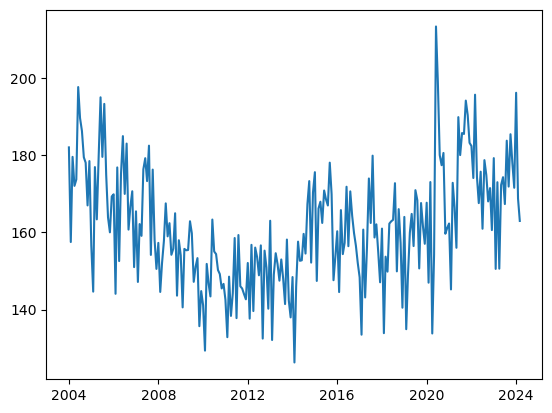

In [8]:
post_2004 = merged.loc[merged['Year'] >= 2004]
plt.plot(post_2004['Time'], post_2004['Beef'])